<a href="https://colab.research.google.com/github/wingated/cs473/blob/main/labs/cs473_lab_week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 473 Lab Week 9

## Introduction:

You will turn in an iPython notebook that performs Gaussian process regression on a simple dataset. You will explore multiple kernels and vary their parameter settings.

When you are done, you should produce visualizations like the following (for noiseless observations):

![noiseless figure](https://raw.githubusercontent.com/wingated/cs473/main/labs/images/lab_week_9_image1.png)

and like this (for noisy observations):

![noisy figure](https://raw.githubusercontent.com/wingated/cs473/main/labs/images/lab_week_9_image2.png)


---
## Grading standards   

Your notebook will be graded on the following:

* 20% Correct implementation of three kernels
* 30% Correct implementation of noiseless GPR
* 30% Correct implementation of noisy GPR
* 20% Six tidy and legible plots, with appropriate ranges

---
## Description

The data that we will use for this lab is simple:

```python
data_xvals = numpy.atleast_2d( [ 1.0, 3.0, 5.0, 6.0, 7.0, 8.0 ] )
data_yvals = numpy.sin( data_xvals )
```
You must perform Gaussian process regression on this dataset, and produce visualizations for both noiseless and noisy observations.

The key equations are given in 17.28 - 17.30 (for the noiseless case) and 17.34-17.36 (for the noisy case).

Your notebook should produce one visualization for each of the following kernel types:

* The linear kernel
* The Gaussian (or RBF) kernel (Eqn. 17.3)
* The polynomial kernel (in the text right after Eqn. 17.20)

Therefore, your notebook should produce six different visualizations: two for each kernel type.

For the noisy observation case, use $\sigma_n^2$=0.1.

For the polynomial kernel use a degree of 3.

For the Gaussian / RBF kernel, set all parameters to 1.0

The mean function for this lab should always return 0.

You should also answer the following questions:

* What happens when the bandwidth parameter $\sigma_n$ of the Gaussian kernel gets small? Gets large?
* What happens when the degree M of the polynomial kernel gets small? Gets large?

Your visualizations should be done on the range [-2 10] of the x-axis.

For the errorbars, you can just plot the mean +/- the variance. This isn't really a statistically meaningful quantity, but it makes the plots look nice. :)

*Hint: a Gaussian process only allows you to make a prediction for a single query point. So how do you generate the smoothly varying lines in the example images?*


---
## Hints

The following functions may be useful to you:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# np.arange()

# plt.gca().fill_between
# plt.scatter

# np.linalg.pinv

# np.eye

In [2]:
# K(x,x′)=(x^T)(x′)
def linear_kernel(X1, X2):
    return X1 @ X2.T

# K(x,x′)=exp(−(||x - x'||^2) / (2ℓ^2)​)
def rbf_kernel(X1, X2, lengthscale=1.0):
    sqdist = np.sum(X1**2, 1).reshape(-1,1) + np.sum(X2**2,1) - 2*X1@X2.T
    return np.exp(-0.5 * sqdist / lengthscale**2)

# K(x,x′)=((x^T)(x′))^M
def polynomial_kernel(X1, X2, degree=3):
    return linear_kernel(X1, X2) ** degree

def mean_function(X):
    return np.zeros((X.shape[0], 1))


def gp_predict_noiseless(X_train, y_train, X_test, kernel_func):
    K = kernel_func(X_train, X_train)
    K_s = kernel_func(X_train, X_test)
    K_ss = kernel_func(X_test, X_test)

    K_inv = np.linalg.pinv(K)

    mu_s = mean_function(X_test) + K_s.T @ K_inv @ (y_train - mean_function(X_train))
    cov_s = K_ss - K_s.T @ K_inv @ K_s

    return mu_s, cov_s


def gp_predict_noisy(X_train, y_train, X_test, kernel_func, sigma_n=0.1):
    K = kernel_func(X_train, X_train) + sigma_n**2 * np.eye(len(X_train))
    K_s = kernel_func(X_train, X_test)
    K_ss = kernel_func(X_test, X_test)

    K_inv = np.linalg.pinv(K)

    mu_s = mean_function(X_test) + K_s.T @ K_inv @ (y_train - mean_function(X_train))
    cov_s = K_ss - K_s.T @ K_inv @ K_s

    return mu_s, cov_s

def plot_gp(mu, cov, X_train, y_train, title):
    std = np.sqrt(np.maximum(np.diag(cov), 0))

    plt.figure(figsize=(8,5))
    plt.plot(X_test, mu, 'b', lw=2)
    plt.fill_between(X_test.flatten(), mu.flatten() - std, mu.flatten() + std, color='b', alpha=0.2)
    plt.scatter(X_train, y_train, c='b', s=50)
    plt.title(title)
    plt.show()
    print()

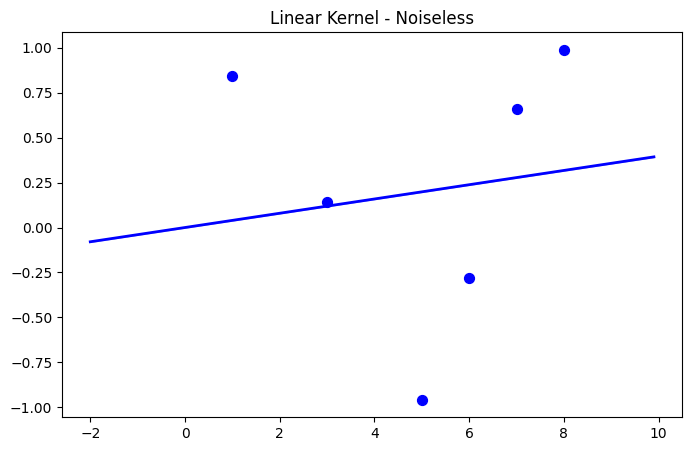

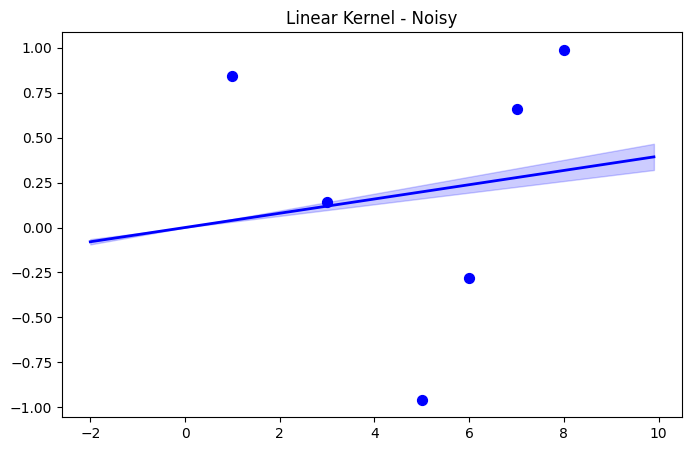

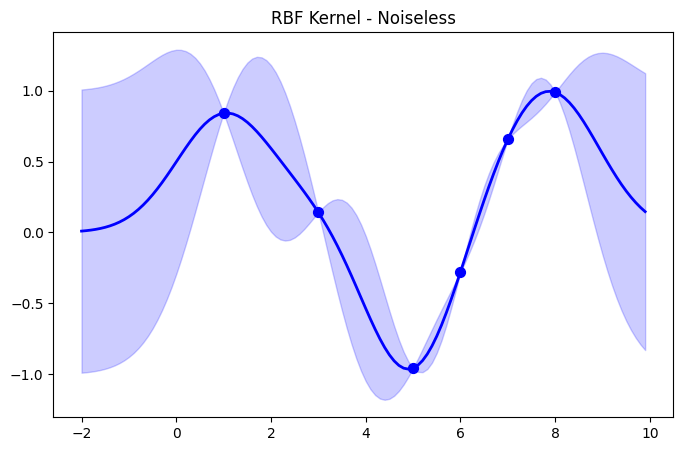

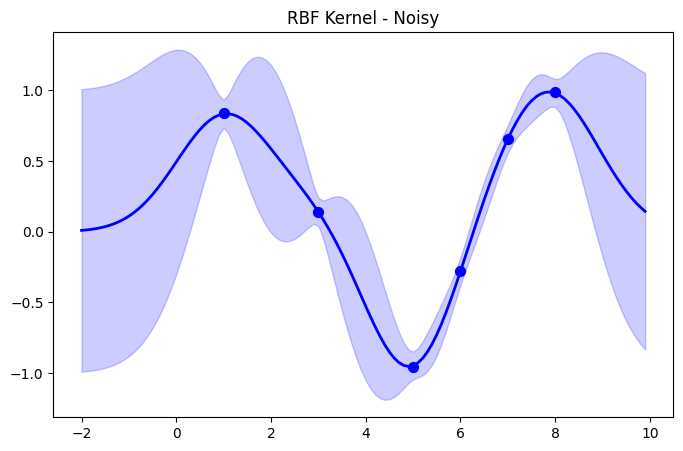

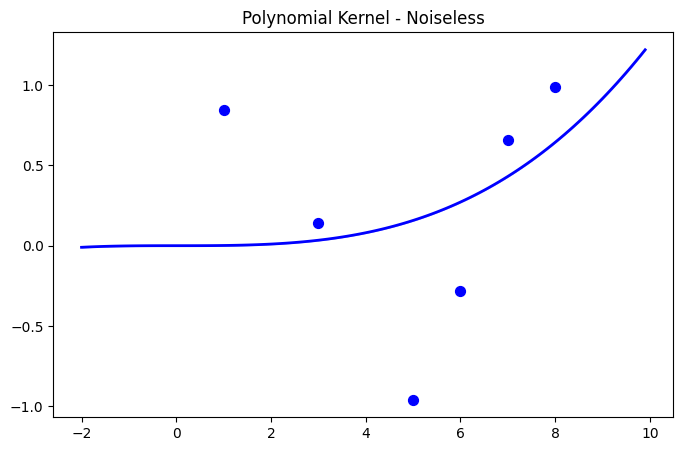

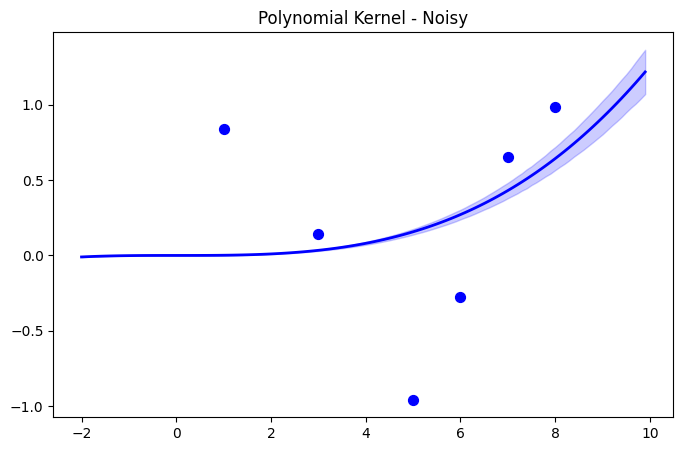

In [3]:
data_xvals = np.atleast_2d([1.0, 3.0, 5.0, 6.0, 7.0, 8.0]).T
data_yvals = np.sin(data_xvals)

X_test = np.arange(-2, 10, 0.1).reshape(-1, 1)

mu, cov = gp_predict_noiseless(data_xvals, data_yvals, X_test, linear_kernel)
plot_gp(mu, cov, data_xvals, data_yvals, "Linear Kernel - Noiseless")

mu, cov = gp_predict_noisy(data_xvals, data_yvals, X_test, linear_kernel)
plot_gp(mu, cov, data_xvals, data_yvals, "Linear Kernel - Noisy")

mu, cov = gp_predict_noiseless(data_xvals, data_yvals, X_test, lambda X1,X2: rbf_kernel(X1,X2,1.0))
plot_gp(mu, cov, data_xvals, data_yvals, "RBF Kernel - Noiseless")

mu, cov = gp_predict_noisy(data_xvals, data_yvals, X_test, lambda X1,X2: rbf_kernel(X1,X2,1.0))
plot_gp(mu, cov, data_xvals, data_yvals, "RBF Kernel - Noisy")

mu, cov = gp_predict_noiseless(data_xvals, data_yvals, X_test, lambda X1,X2: polynomial_kernel(X1,X2,3))
plot_gp(mu, cov, data_xvals, data_yvals, "Polynomial Kernel - Noiseless")

mu, cov = gp_predict_noisy(data_xvals, data_yvals, X_test, lambda X1,X2: polynomial_kernel(X1,X2,3))
plot_gp(mu, cov, data_xvals, data_yvals, "Polynomial Kernel - Noisy")

When the bandwidth parameter ($\sigma_n$) of the Gaussian kernel gets small, the kernel becomes very “narrow,” meaning that only points close to each other are considered correlated and the kernel can easily overfit noisy data. When it gets large, the opposite naturally occurs: the kernel becomes very “wide” and allows all points to influence each other, possibly underfitting rapid changes.

When the degree (M) of the polynomial kernel gets small, predictions are simpler with smoother curves. When it gets large, predictions can oscillate wildly and overfit training points.